## Installation

Pyomo installation
> conda install -c conda-forge pyomo

Install the solver (any solver you can choose)
>conda install -c conda-forge ipopt 

## Tools of Visualization in Python

* Seaborn
* Bokeh
* Cleam
* pygal
* geoplotlib
* Lether
* missingno
* ggplot 
* plotly
* Matplotlib


## Example 1

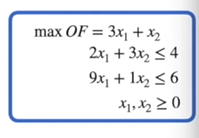

In [1]:
from pyomo.environ import *
import matplotlib.pyplot as plt
import numpy as np
import random



#### Create an abstract model

In [17]:
model = AbstractModel()

model.x1 = Var (bounds=(0,4), within = NonNegativeReals  )
model.x2 = Var (bounds=(0,4), within = NonNegativeReals  )

#These parameters are going change when updating (in the instance)
model.all = Param(mutable=True)

model.eq1 = Constraint(expr = model.all * model.x1 + 3*model.x2 <= 4 )
model.eq2 = Constraint(expr = 9 * model.x1 + 1*model.x2 <= 6 )
model.obj = Objective(expr=3*model.x1 + model.x2, sense=maximize )


#### Create an instance model from the abstract model

In [21]:
# 'glpk' : solver for linear problems
opt = SolverFactory('glpk')

instance = model.create_instance()

instance.all = 7 #This allow to update the objective function (model.all = Param(mutable=True))

results = opt.solve(instance) # solves and updates instance
if (results.solver.status == SolverStatus.ok) and (results.solver.termination_condition == TerminationCondition.optimal):
    print('feasible')
elif (results.solver.termination_condition == TerminationCondition.infeasible):
    print('infeasible')
else:
    print ('Solver Status:',  results.solver.status)




feasible


In [22]:
instance.eq1.pprint()
instance.eq2.pprint()

eq1 : Size=1, Index=None, Active=True
    Key  : Lower : Body        : Upper : Active
    None :  -Inf : 2*x1 + 3*x2 :   4.0 :   True
eq2 : Size=1, Index=None, Active=True
    Key  : Lower : Body      : Upper : Active
    None :  -Inf : 9*x1 + x2 :   6.0 :   True


In [23]:
print('X1 : ',value(instance.x1))
print('X2 : ',value(instance.x2))
print('Obtimal value of ObjFn : ',value(instance.obj))

X1 :  0.56
X2 :  0.96
Obtimal value of ObjFn :  2.64
